In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("liver_patient.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [5]:
enc = LabelEncoder()
data.Gender = enc.fit_transform(data.Gender)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  liver_disease               583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [6]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,liver_disease
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.240,1.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.176,1.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.236,1.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.280,1.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.040,1.0


In [7]:
X = data.drop(['liver_disease'], axis=1)
y = data['liver_disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


In [8]:
# `baseModel = GradientBoostingClassifier(random_state=0)

# paramgrid = {
#     'n_estimators': [2,4,5,6,7],
#     'learning_rate': [0.01, 0.2, 0.3, 0.05, 0.7],
#     'min_samples_split': [3,4,5,6,7],
#     'max_depth': [5,8,9,10,20]
# }

# gs = GridSearchCV(estimator=baseModel, param_grid=paramgrid, cv=7, n_jobs=-1)
# gs.fit(X_train, y_train)`

In [9]:
gs.best_params_

NameError: name 'gs' is not defined

In [ ]:
gs.best_score_

np.float64(0.7060476836596239)

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X_train)
x_pca.shape

(466, 2)

In [13]:
GB = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=3, n_estimators=2, random_state=0)
GB.fit(x_pca, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_split=3,
                           n_estimators=2, random_state=0)

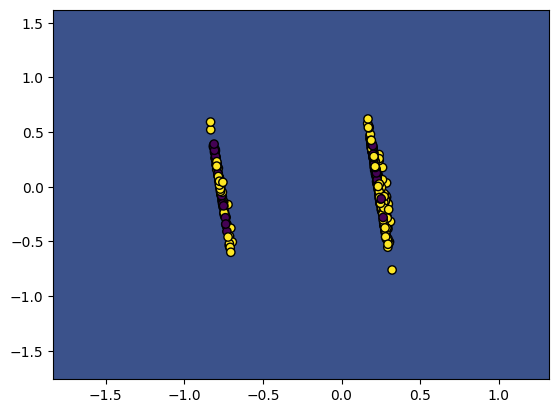

In [18]:
# xmin, xmax = x_pca[:, 0].min()-1, x_pca[:, 0].max()+1
# ymin, ymax = x_pca[:, 1].min()-1, x_pca[:, 1].max()+1 

# xx, yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))

# Z = GB.predict(np.c_[xx.ravel(), yy.ravel()])

x_min, x_max = x_pca[:, 0].min() -1, x_pca[:, 0].max() +1
y_min, y_max = x_pca[:, 1].min() -1, x_pca[:, 1].max() +1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = GB.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z.reshape(xx.shape))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train, edgecolor="k")

plt.show()

In [15]:
Z

array([1., 1., 1., ..., 1., 1., 1.], shape=(40000,))

In [16]:
y_train.unique()

array([1., 0.])